# Credit Score Classification Task

The main goal of this task is to classify customers' credit scores (Poor, Standard, and Good) using the dataset named train.csv

## General Objectives
- Perform **EDA (Exploratory Data Analysis)**;
- **build a model** (classification) and classify the `Credit_Score` column into three categories (Poor, Standard, Good) ;
- Measure the performance of the model (accuracy, or other metrics);
- Make predictions based on new data.

---
## About the Dataset
- **File name:** `train.csv`
- **Number of rows** Approximately 100,000 samples (for example).
- **Main columns (example):**
    - `ID`: Unique identifier.
    - `Customer_ID`: Customer identifier.
    - `Month`: The month the customer data belongs to.
    - `Name`: Customer's name.
    - `Age`: Customer's age.
    - `SSN`: Social security number (fully confidential).
    - `Occupation`: Customer's job (e.g., Scientist, Teacher, etc.).
    - `Annual_Income`: Annual income.
    - `Monthly_Inhand_Salary`: Monthly disposable salary.
    - `Num_Bank_Accounts`: Number of bank accounts.
    - `Num_Credit_Card`: Number of credit cards.
    - `Interest_Rate`: Interest rate (average interest).
    - `Num_of_Loan`: Number of loans taken.
    - `Type_of_Loan`: Type of loan (in text format).
    - `Delay_from_due_date`: Average delay in credit card payments (in days).
    - `Num_of_Delayed_Payment`: Total number of delayed payments.
    - `Changed_Credit_Limit`: Change in credit limit.
    - `Num_Credit_Inquiries`: Number of credit inquiries.
    - `Credit_Mix`: Credit type (Bad, Standard, Good).
    - `Outstanding_Debt`: Remaining debt.
    - `Credit_Utilization_Ratio`: Percentage of credit utilization.
    - `Credit_History_Age`: Age of credit history.
    - `Payment_of_Min_Amount`: Whether the minimum payment is made on time (Yes/No).
    - `Total_EMI_per_month`: Total EMI paid per month (Principal + Interest).
    - `Amount_invested_monthly`: Monthly invested amount.
    - `Payment_Behaviour`: Payment behavior (in text format).
    - `Monthly_Balance`: Monthly balance.
    - **Target column**: `Credit_Score` (Poor, Standard, Good).



<h2>1. Dataset Loading and Initial Exploration<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer



from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.shape

(100000, 28)

In [6]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


The label data is imbalanced :

In [8]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

<h2>2. EDA (Exploratory Data Analysis)<h2>

Text(0.5, 1.0, 'Boxplot of credit score across annual income ranges')

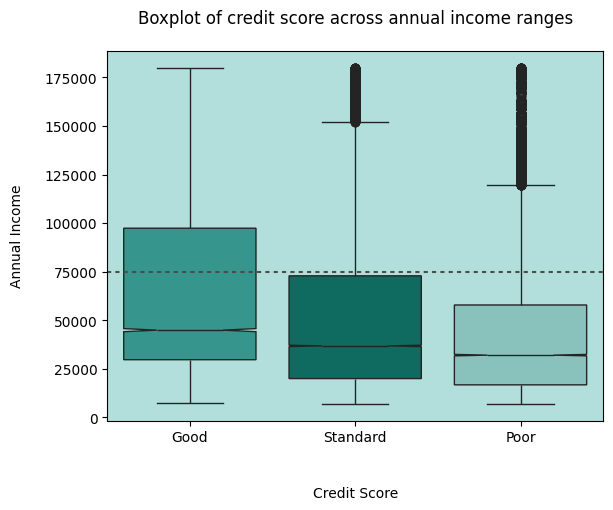

In [9]:
palette = {"Poor": "#80CBC4", "Good": "#26A69A", "Standard": "#00796B"}

bx = sns.boxplot(data=df, x= df['Credit_Score'],  y = df['Annual_Income'], notch=True, palette=palette)


bx.axhline(75000, color=".3", dashes=(2, 2))

bx.set_facecolor("#B2DFDB") 

bx.set_xlabel('Credit Score',labelpad=30)
bx.set_ylabel('Annual Income', labelpad=15)

plt.title("Boxplot of credit score across annual income ranges", pad = 20)

Text(0.5, 1.0, 'Correlation Matrix of Selected Columns')

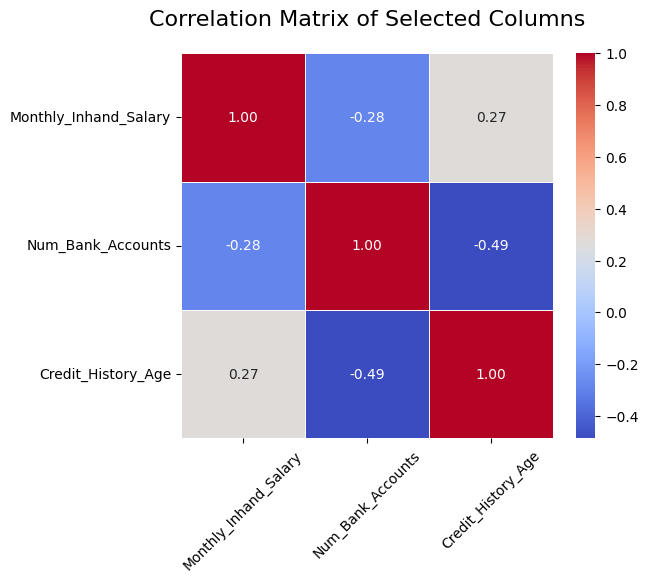

In [10]:
correlation_matrix = df[['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Credit_History_Age']].corr()

plt.figure(figsize=(6, 5))


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45)

plt.title("Correlation Matrix of Selected Columns", fontsize=16, pad =20)

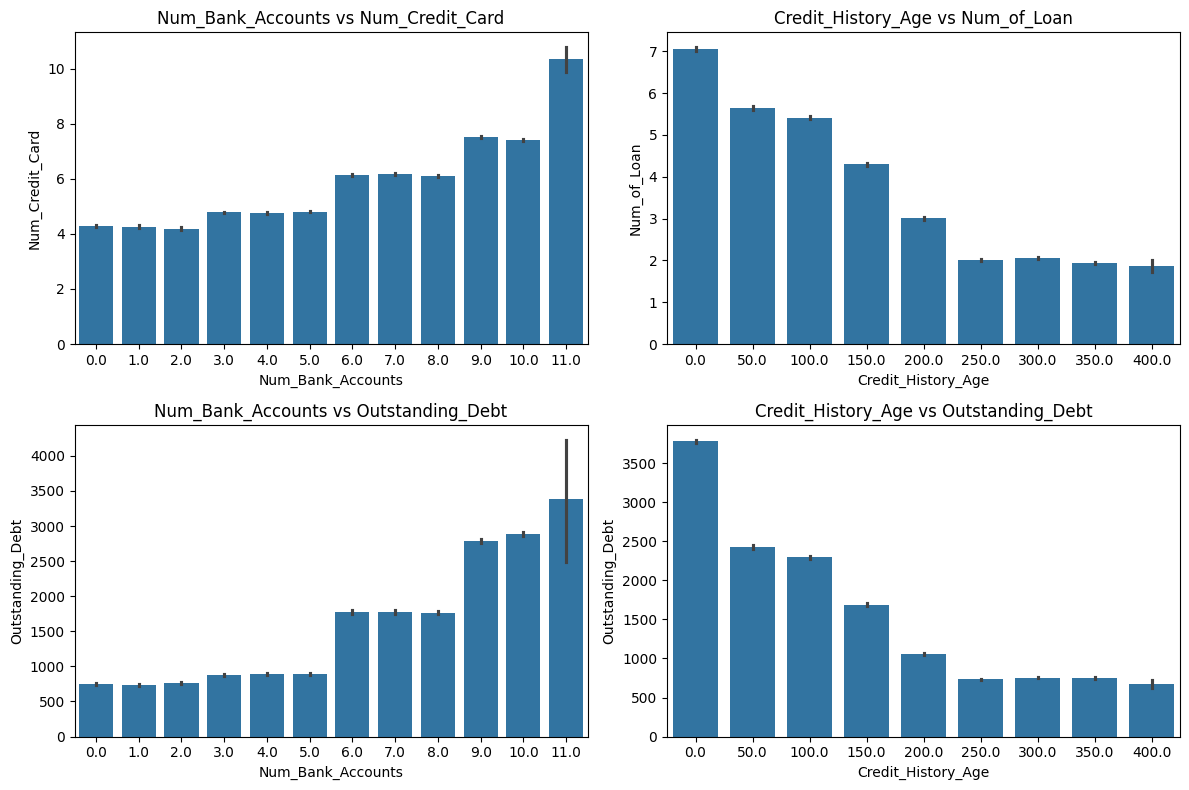

In [11]:

plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Num_Bank_Accounts', y='Num_Credit_Card')
plt.title('Num_Bank_Accounts vs Num_Credit_Card')


plt.subplot(2, 2, 2)
sns.barplot(data=df, x=(df['Credit_History_Age'] // 50) * 50, y='Num_of_Loan')
plt.title('Credit_History_Age vs Num_of_Loan')


plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Num_Bank_Accounts', y='Outstanding_Debt')
plt.title('Num_Bank_Accounts vs Outstanding_Debt')


plt.subplot(2, 2, 4)
sns.barplot(data=df, x=(df['Credit_History_Age'] // 50) * 50, y='Outstanding_Debt')
plt.title('Credit_History_Age vs Outstanding_Debt')


plt.tight_layout()
plt.show()


<h2>3. Model Building <h2>

In [12]:
df = df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)

In [13]:
df.select_dtypes(include=object).nunique()

Occupation                 15
Type_of_Loan             6261
Credit_Mix                  3
Payment_of_Min_Amount       3
Payment_Behaviour           6
Credit_Score                3
dtype: int64

In [14]:
X = df.drop('Credit_Score', axis=1)
y= df['Credit_Score']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
ord_e = OrdinalEncoder()

X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = ord_e.fit_transform(X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']])

X_test[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = ord_e.transform(X_test[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']])

In [17]:

frequency_map = X_train['Type_of_Loan'].value_counts()


X_train['Type_of_Loan_Frequency'] = X_train['Type_of_Loan'].map(frequency_map)
X_test['Type_of_Loan_Frequency'] = X_test['Type_of_Loan'].map(frequency_map)


X_train = X_train.drop('Type_of_Loan', axis=1)
X_test = X_test.drop('Type_of_Loan', axis=1)



In [18]:

undersampler = RandomUnderSampler(sampling_strategy={'Standard': 33000}, random_state=42)
X_temp, y_temp = undersampler.fit_resample(X_train, y_train)


oversampler = RandomOverSampler(sampling_strategy={'Good': 30000, 'Poor': 30000}, random_state=42)
X_train, y_train = oversampler.fit_resample(X_temp, y_temp)


In [19]:
y_train.value_counts()

Credit_Score
Standard    33000
Good        30000
Poor        30000
Name: count, dtype: int64

In [22]:
X_train.shape

(93000, 23)

In [23]:
model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=100, bootstrap=False)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8461

Classification Report:
               precision    recall  f1-score   support

        Good       0.80      0.85      0.83      3527
        Poor       0.81      0.89      0.85      5874
    Standard       0.89      0.82      0.85     10599

    accuracy                           0.85     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.85      0.85      0.85     20000



<h2> Next, feature engineering, guided by feature importance and correlation analysis, can be applied to improve the model performance. <h2>

In [24]:
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
14,Outstanding_Debt,0.106848
13,Credit_Mix,0.078447
7,Interest_Rate,0.078067
9,Delay_from_due_date,0.065375
16,Credit_History_Age,0.065287
11,Changed_Credit_Limit,0.046532
12,Num_Credit_Inquiries,0.042459
0,Month,0.038940
17,Payment_of_Min_Amount,0.038793
21,Monthly_Balance,0.038560


In [25]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)


df_combined = pd.concat([X_train, pd.Series(y_train_enc, name='Credit_Score')], axis=1)

correlations = df_combined.corr()

target_correlations = correlations['Credit_Score'].sort_values(ascending=False)

print(target_correlations)


Credit_Score                1.000000
Num_of_Delayed_Payment      0.306221
Num_Bank_Accounts           0.289928
Payment_of_Min_Amount       0.272476
Interest_Rate               0.267417
Changed_Credit_Limit        0.247712
Num_Credit_Card             0.234382
Delay_from_due_date         0.229645
Num_Credit_Inquiries        0.200894
Credit_Mix                  0.187530
Num_of_Loan                 0.176326
Outstanding_Debt            0.157918
Payment_Behaviour           0.061035
Occupation                  0.012377
Credit_Utilization_Ratio   -0.027928
Month                      -0.041810
Total_EMI_per_month        -0.063493
Type_of_Loan_Frequency     -0.089131
Age                        -0.103792
Monthly_Balance            -0.104245
Amount_invested_monthly    -0.118525
Monthly_Inhand_Salary      -0.139533
Annual_Income              -0.142348
Credit_History_Age         -0.222912
Name: Credit_Score, dtype: float64


In [26]:

mc_cols = df[['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
        'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
        'Num_Credit_Inquiries', 'Outstanding_Debt']]

vif_data = pd.DataFrame()
vif_data['Feature'] = mc_cols.columns
vif_data['VIF'] = [variance_inflation_factor(mc_cols.values, i) for i in range(mc_cols.shape[1])]
print(vif_data)


                  Feature       VIF
0       Num_Bank_Accounts  9.980601
1         Num_Credit_Card  8.196511
2           Interest_Rate  9.049281
3             Num_of_Loan  5.981098
4     Delay_from_due_date  5.934788
5  Num_of_Delayed_Payment  9.792852
6    Num_Credit_Inquiries  6.695322
7        Outstanding_Debt  5.666366
